In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip -q concrete_data_week4.zip

unzip:  cannot find either concrete_data_week4.zip or concrete_data_week4.zip.zip.


In [3]:
#from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from keras.applications.vgg16 import preprocess_input

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (C:\Users\assis\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image\__init__.py)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
import datetime

In [ ]:

#@markdown ---
#@markdown ### Enter number of classes:
num_classes = 1 #@param {type:"integer"}

#@markdown

#@markdown ### Enter image size:
image_resize = 224 #@param {type:"integer"}

#@markdown

#@markdown ### Enter number of epochs:
num_epochs = 2 #@param {type:"integer"}

#@markdown

#@markdown ### Enter learning rate:
LR = 0.001 #@param {type:"number"}

#@markdown

#@markdown ### Enter batch sizes:
batch_size_training = 128 #@param {type:"integer"}
batch_size_validation = 64 #@param {type:"integer"}
batch_size_test = 32 #@param {type:"integer"}

#@markdown

#@markdown ### Enter director paths:
train_path = '/content/train' #@param {type:"string"}
valid_path = '/content/val' #@param {type:"string"}
test_path = '/content/test' #@param {type:"string"}
#@markdown ---

In [ ]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1./255)

#  Build train data

In [ ]:
train_generator = data_generator.flow_from_directory(
  "concrete_data_week4/train",
  target_size=(image_resize, image_resize),
  batch_size=batch_size_training,
  class_mode='binary')

Found 30001 images belonging to 2 classes.


In [ ]:
print('Class indices:', train_generator.class_indices)
print('Number of train samples:', train_generator.samples)
print('First and last 5 filenames:', train_generator.filenames[0:5], train_generator.filenames[-5:])

Class indices: {'negative': 0, 'positive': 1}
Number of train samples: 30001
First and last 5 filenames: ['negative/00001.jpg', 'negative/00002.jpg', 'negative/00003.jpg', 'negative/00004.jpg', 'negative/00005.jpg'] ['positive/14996_1.jpg', 'positive/14997_1.jpg', 'positive/14998_1.jpg', 'positive/14999_1.jpg', 'positive/15000_1.jpg']


In [ ]:
labels = train_generator.classes
unique_labels, label_counts = np.unique(labels, return_counts=True)

print("Number of unique labels:", len(unique_labels))
for label, count in zip(unique_labels, label_counts):
    print("Label:", label, "- Count:", count)

Number of unique labels: 2
Label: 0 - Count: 15001
Label: 1 - Count: 15000


In [ ]:
first_batch = train_generator.next()
first_batch

(array([[[[ 0.21592548,  0.21655296,  0.19733335],
          [ 0.21200392,  0.21263139,  0.19341178],
          [ 0.20416078,  0.20478825,  0.18556863],
          ...,
          [ 0.23161177,  0.21655296,  0.20517649],
          [ 0.23553334,  0.22831766,  0.2169412 ],
          [ 0.24729805,  0.24008237,  0.2287059 ]],
 
         [[ 0.21592548,  0.21655296,  0.19733335],
          [ 0.21592548,  0.21655296,  0.19733335],
          [ 0.21200392,  0.21263139,  0.19341178],
          ...,
          [ 0.23553334,  0.22047453,  0.20909806],
          [ 0.23945491,  0.23223923,  0.22086276],
          [ 0.2512196 ,  0.24400394,  0.23262747]],
 
         [[ 0.21200392,  0.21263139,  0.19341178],
          [ 0.21592548,  0.21655296,  0.19733335],
          [ 0.21984705,  0.22047453,  0.20125492],
          ...,
          [ 0.23945491,  0.2243961 ,  0.21301962],
          [ 0.24337648,  0.2361608 ,  0.22478433],
          [ 0.25514117,  0.2479255 ,  0.23654903]],
 
         ...,
 
         [[ 

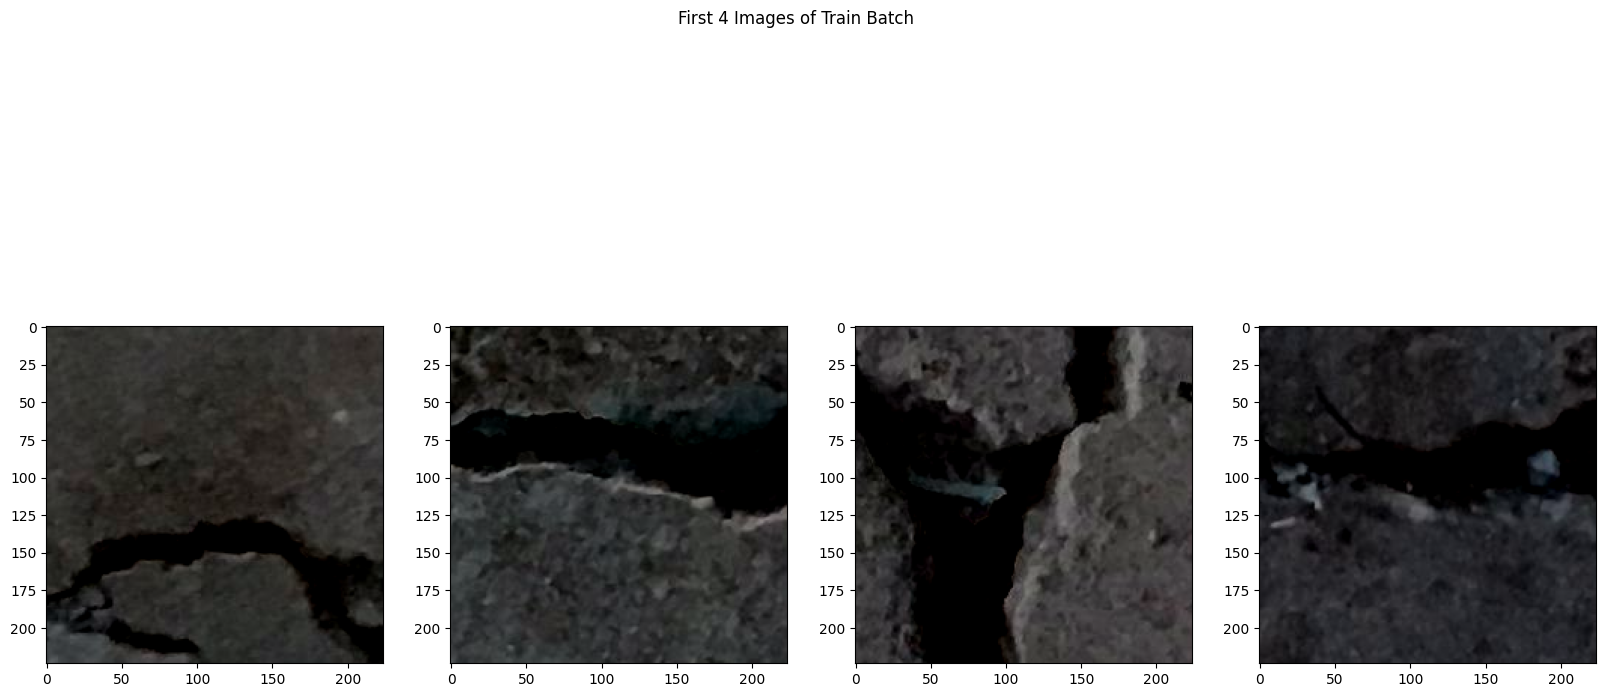

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

ind = 0
for ax1 in axs:
    image_data = first_batch[0][ind]
    ax1.imshow(image_data)
    ind += 1

fig.suptitle('First 4 Images of Train Batch')
plt.show()

# Build validation data

In [ ]:
validation_generator = data_generator.flow_from_directory(
  "concrete_data_week4/valid",
  target_size=(image_resize, image_resize),
  batch_size=batch_size_validation,
  class_mode='binary')

Found 9501 images belonging to 2 classes.


In [ ]:
print('Class indices:', validation_generator.class_indices)
print('Number of validation samples:', validation_generator.samples)
print('First and last 5 filenames:', validation_generator.filenames[0:5], validation_generator.filenames[-5:])

Class indices: {'negative': 0, 'positive': 1}
Number of validation samples: 9501
First and last 5 filenames: ['negative/15001.jpg', 'negative/15002.jpg', 'negative/15003.jpg', 'negative/15004.jpg', 'negative/15005.jpg'] ['positive/19746.jpg', 'positive/19747.jpg', 'positive/19748.jpg', 'positive/19749.jpg', 'positive/19750.jpg']


In [ ]:
labels = validation_generator.classes
unique_labels, label_counts = np.unique(labels, return_counts=True)

print("Number of unique labels:", len(unique_labels))
for label, count in zip(unique_labels, label_counts):
    print("Label:", label, "- Count:", count)

Number of unique labels: 2
Label: 0 - Count: 4751
Label: 1 - Count: 4750


In [ ]:
first_batch = validation_generator.next()
first_batch

(array([[[[ 0.50220007,  0.45184708,  0.42478433],
          [ 0.50220007,  0.45184708,  0.42478433],
          [ 0.48651373,  0.4361608 ,  0.40909806],
          ...,
          [ 0.43553334,  0.39302355,  0.36988238],
          [ 0.43553334,  0.39302355,  0.36988238],
          [ 0.43553334,  0.39302355,  0.36988238]],
 
         [[ 0.50220007,  0.45184708,  0.42478433],
          [ 0.49827844,  0.4479255 ,  0.42086276],
          [ 0.48651373,  0.4361608 ,  0.40909806],
          ...,
          [ 0.43553334,  0.39302355,  0.36988238],
          [ 0.43553334,  0.39302355,  0.36988238],
          [ 0.43553334,  0.39302355,  0.36988238]],
 
         [[ 0.50612164,  0.45576864,  0.4287059 ],
          [ 0.50220007,  0.45184708,  0.42478433],
          [ 0.4904353 ,  0.44008237,  0.41301963],
          ...,
          [ 0.4394549 ,  0.39694512,  0.37380394],
          [ 0.4394549 ,  0.39694512,  0.37380394],
          [ 0.4394549 ,  0.39694512,  0.37380394]],
 
         ...,
 
         [[ 

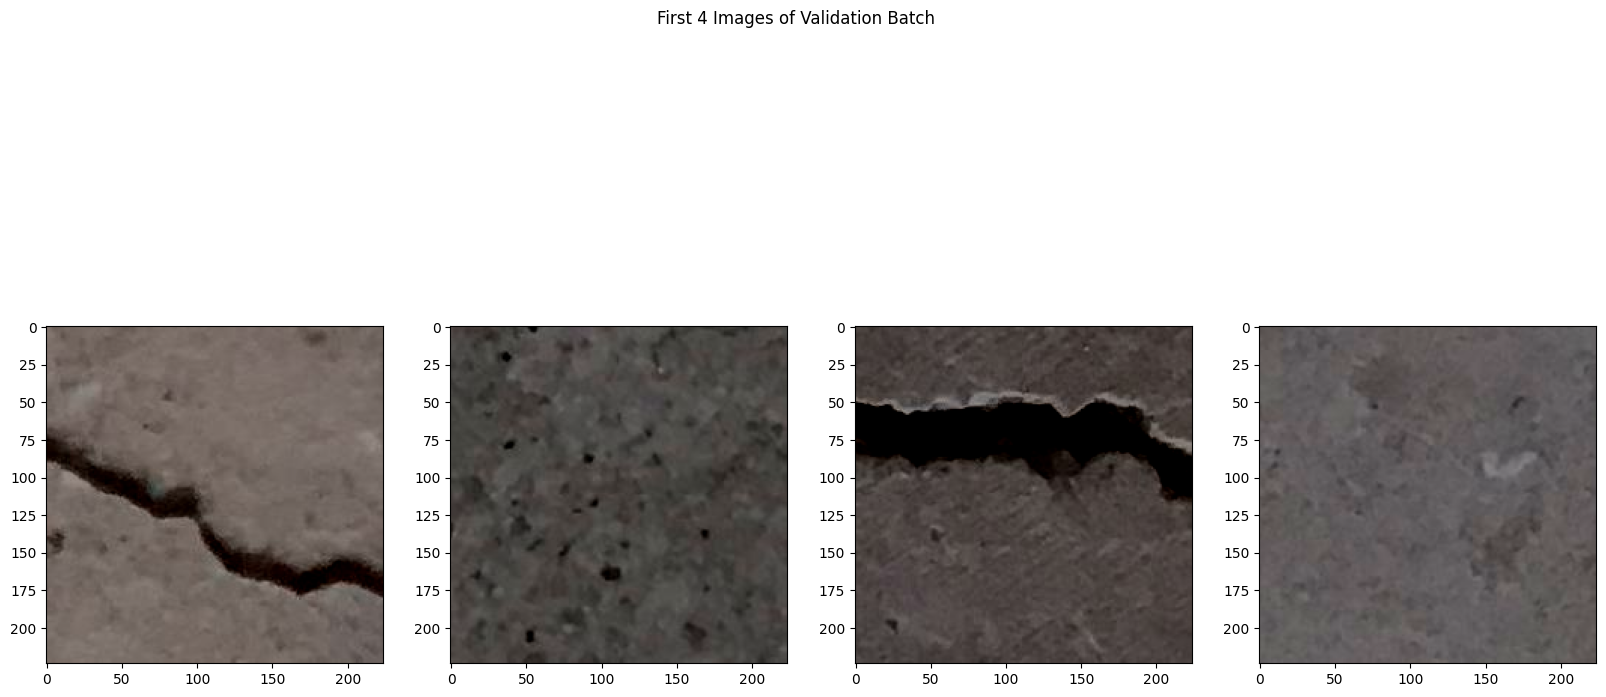

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

ind = 0
for ax1 in axs:
    image_data = first_batch[0][ind]
    ax1.imshow(image_data)
    ind += 1

fig.suptitle('First 4 Images of Validation Batch')
plt.show()

# Train Models

In [ ]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

# 2.1 Train with ResNet-50 architecture

In [ ]:
from keras.applications import ResNet50

# Build the model

In [ ]:
resnet_50_model = Sequential()

resnet_50_model.add(ResNet50(
  include_top=False,
  pooling='avg',
  weights='imagenet',
))

resnet_50_model.add(Dense(num_classes, activation='sigmoid'))
resnet_50_model.layers

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_50_model.layers[0].layers

In [ ]:
resnet_50_model.layers[0].trainable = False

In [ ]:
resnet_50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
resnet_50_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=LR), loss='binary_crossentropy', metrics=['accuracy',
                                                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                                                tf.keras.metrics.FalsePositives(),
                                                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                                                tf.keras.metrics.TruePositives(),
                                                                                                                tf.keras.metrics.Precision(),
                                                                                                                tf.keras.metrics.Recall()])

In [ ]:
get_ipython().system('rm -rf logs')
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir)

In [ ]:
callbacks_list = [tensorboard_callback]

#  Train the model

In [ ]:
fit_history = resnet_50_model.fit_generator(
  train_generator,
  steps_per_epoch=steps_per_epoch_training,
  epochs=num_epochs,
  validation_data=validation_generator,
  validation_steps=steps_per_epoch_validation,
  callbacks=[callbacks_list],
  verbose=1,
)

<ipython-input-30-c7c5b91aa4c8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = resnet_50_model.fit_generator(


Epoch 1/2
235/235 [==============================] - 162s 618ms/step - loss: 0.5878 - accuracy: 0.8104 - false_negatives: 3535.0000 - false_positives: 2152.0000 - true_negatives: 12849.0000 - true_positives: 11465.0000 - precision: 0.8420 - recall: 0.7643 - val_loss: 0.5116 - val_accuracy: 0.8835 - val_false_negatives: 1078.0000 - val_false_positives: 29.0000 - val_true_negatives: 4722.0000 - val_true_positives: 3672.0000 - val_precision: 0.9922 - val_recall: 0.7731
Epoch 2/2
235/235 [==============================] - 136s 578ms/step - loss: 0.4460 - accuracy: 0.9098 - false_negatives: 2550.0000 - false_positives: 157.0000 - true_negatives: 14844.0000 - true_positives: 12450.0000 - precision: 0.9875 - recall: 0.8300 - val_loss: 0.4168 - val_accuracy: 0.8551 - val_false_negatives: 1361.0000 - val_false_positives: 16.0000 - val_true_negatives: 4735.0000 - val_true_positives: 3389.0000 - val_precision: 0.9953 - val_recall: 0.7135


In [ ]:
loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall = resnet_50_model.evaluate(validation_generator, batch_size=batch_size_validation)
print(f"loss: {loss}\n accuracy: {accuracy}\n false_negatives: {false_negatives}\n false_positives: {false_positives}\n true_negatives: {true_negatives}\n true_positives: {true_positives}\n precision: {precision}\n recall: {recall}")

149/149 [==============================] - 34s 227ms/step - loss: 0.4168 - accuracy: 0.8551 - false_negatives: 1361.0000 - false_positives: 16.0000 - true_negatives: 4735.0000 - true_positives: 3389.0000 - precision: 0.9953 - recall: 0.7135
loss: 0.4168141484260559
 accuracy: 0.8550679087638855
 false_negatives: 1361.0
 false_positives: 16.0
 true_negatives: 4735.0
 true_positives: 3389.0
 precision: 0.9953010082244873
 recall: 0.7134736776351929


# 3.2 Confusion matrix

In [ ]:
y_true = test_generator.classes

In [ ]:
y_pred_resnet = resnet_50_model.predict(test_generator)

16/16 [==============================] - 2s 101ms/step


In [ ]:
y_pred_resnet = np.round(y_pred_resnet)

In [ ]:
cm = confusion_matrix(y_true, y_pred_resnet)

In [ ]:
print("ResNet-50 Confusion Matrix:")
print(cm)

ResNet-50 Confusion Matrix:
[[250   0]
 [ 61 189]]


16/16 [==============================] - 3s 177ms/step


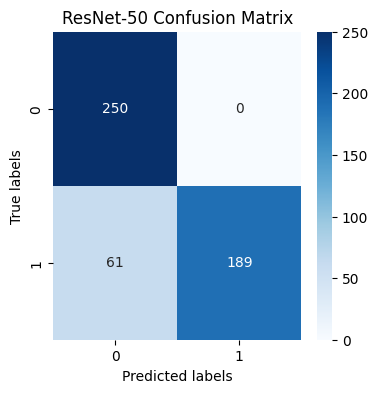

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the confusion matrix values
y_true = test_generator.classes
y_pred_resnet = resnet_50_model.predict(test_generator)
y_pred_resnet = np.round(y_pred_resnet)
cm = confusion_matrix(y_true, y_pred_resnet)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('ResNet-50 Confusion Matrix')
plt.show()


#  Classification report of ResNet-50 model

In [ ]:
cr = classification_report(y_true, y_pred_resnet, target_names=test_generator.class_indices.keys())

In [ ]:
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      1.00      0.89       250
    positive       1.00      0.76      0.86       250

    accuracy                           0.88       500
   macro avg       0.90      0.88      0.88       500
weighted avg       0.90      0.88      0.88       500



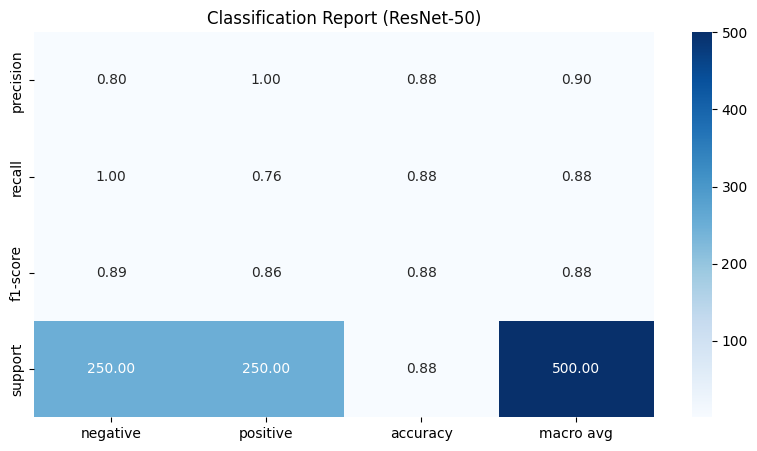

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
cr = classification_report(y_true, y_pred_resnet, target_names=test_generator.class_indices.keys())

# Convert classification report to a DataFrame
cr_df = pd.DataFrame(classification_report(y_true, y_pred_resnet, target_names=test_generator.class_indices.keys(), output_dict=True)).T

# Plot the DataFrame
plt.figure(figsize=(10, 5))
sns.heatmap(cr_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report (ResNet-50)')
plt.show()


In [ ]:
# Assuming y_true and y_pred_resnet are already defined
# Generate the classification report
cr = classification_report(y_true, y_pred_resnet, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert the classification report to a DataFrame
cr_df = pd.DataFrame(cr).T

# Print the DataFrame as a formatted text table
print("Classification Report for ResNet-50:")
display(cr_df)

Classification Report for ResNet-50:


,precision,recall,f1-score,support
negative,0.803859,1.000,0.891266,250.000
positive,1.000000,0.756,0.861048,250.000
accuracy,0.878000,0.878,0.878000,0.878
macro avg,0.901929,0.878,0.876157,500.000
weighted avg,0.901929,0.878,0.876157,500.000


from matplotlib import pyplot as plt
_df_0['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='precision', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='recall', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='f1-score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='support', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# ROC and AUC score of ResNet-50 model

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_pred_resnet)

In [ ]:
roc_auc = auc(fpr, tpr)

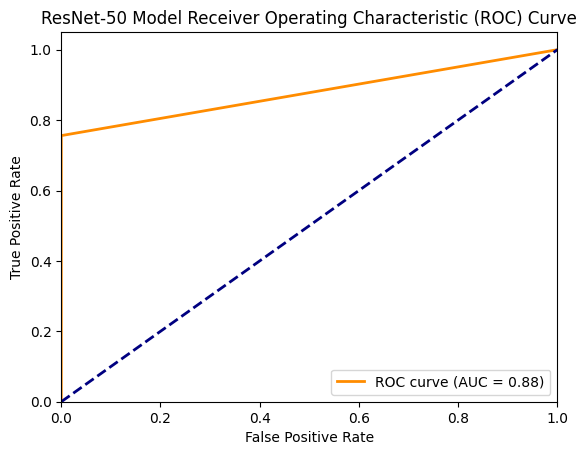

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet-50 Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Train with VGG-16 architecture

In [ ]:
from keras.applications import VGG16

#  Build the model VGG16

In [ ]:
vgg_16_model = Sequential()

vgg_16_model.add(VGG16(
  include_top=False,
  pooling='avg',
  weights='imagenet',
))

vgg_16_model.add(Dense(num_classes, activation='sigmoid'))
vgg_16_model.layers

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_16_model.layers[0].layers

In [ ]:
vgg_16_model.layers[0].trainable = False

In [ ]:
vgg_16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14715201 (56.13 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


# Compile the model VGG16

In [ ]:
vgg_16_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=LR), loss='binary_crossentropy', metrics=['accuracy',
                                                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                                                tf.keras.metrics.FalsePositives(),
                                                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                                                tf.keras.metrics.TruePositives(),
                                                                                                                tf.keras.metrics.Precision(),
                                                                                                                tf.keras.metrics.Recall()])

# Train the model VGG16

In [ ]:
fit_history = vgg_16_model.fit_generator(
  train_generator,
  steps_per_epoch=steps_per_epoch_training,
  epochs=num_epochs,
  validation_data=validation_generator,
  validation_steps=steps_per_epoch_validation,
  callbacks=[callbacks_list],
  verbose=1,
)

<ipython-input-54-7c0b953997ba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = vgg_16_model.fit_generator(


Epoch 1/2
235/235 [==============================] - 213s 818ms/step - loss: 0.4213 - accuracy: 0.9077 - false_negatives_1: 1232.0000 - false_positives_1: 1536.0000 - true_negatives_1: 13465.0000 - true_positives_1: 13768.0000 - precision_1: 0.8996 - recall_1: 0.9179 - val_loss: 0.2601 - val_accuracy: 0.9477 - val_false_negatives_1: 184.0000 - val_false_positives_1: 313.0000 - val_true_negatives_1: 4438.0000 - val_true_positives_1: 4566.0000 - val_precision_1: 0.9358 - val_recall_1: 0.9613
Epoch 2/2
235/235 [==============================] - 163s 694ms/step - loss: 0.1871 - accuracy: 0.9671 - false_negatives_1: 487.0000 - false_positives_1: 499.0000 - true_negatives_1: 14502.0000 - true_positives_1: 14513.0000 - precision_1: 0.9668 - recall_1: 0.9675 - val_loss: 0.1333 - val_accuracy: 0.9792 - val_false_negatives_1: 108.0000 - val_false_positives_1: 90.0000 - val_true_negatives_1: 4661.0000 - val_true_positives_1: 4642.0000 - val_precision_1: 0.9810 - val_recall_1: 0.9773


In [ ]:
loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall = vgg_16_model.evaluate(validation_generator, batch_size=batch_size_validation)
print(f"loss: {loss}\n accuracy: {accuracy}\n false_negatives: {false_negatives}\n false_positives: {false_positives}\n true_negatives: {true_negatives}\n true_positives: {true_positives}\n precision: {precision}\n recall: {recall}")

149/149 [==============================] - 37s 247ms/step - loss: 0.1333 - accuracy: 0.9792 - false_negatives_1: 108.0000 - false_positives_1: 90.0000 - true_negatives_1: 4661.0000 - true_positives_1: 4642.0000 - precision_1: 0.9810 - recall_1: 0.9773
loss: 0.13330082595348358
 accuracy: 0.9791600704193115
 false_negatives: 108.0
 false_positives: 90.0
 true_negatives: 4661.0
 true_positives: 4642.0
 precision: 0.9809805750846863
 recall: 0.9772631525993347


In [ ]:
vgg_16_model.save('classifier_vgg_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate and Compare Models VGG16

In [ ]:
test_generator = data_generator.flow_from_directory(
  '/content/concrete_data_week4/test',
  target_size=(image_resize, image_resize),
  shuffle=False,
  class_mode='binary')

Found 500 images belonging to 2 classes.


# Predict test and make dataframe VGG16

In [ ]:
filenames=test_generator.filenames

In [ ]:
test_generator.class_indices

{'negative': 0, 'positive': 1}

# Confusion matrix of VGG-16 model

In [ ]:
y_pred_vgg = vgg_16_model.predict(test_generator)

16/16 [==============================] - 13s 439ms/step


In [ ]:
y_pred_vgg = np.round(y_pred_vgg)

In [ ]:
cm = confusion_matrix(y_true, y_pred_vgg)

In [ ]:
print("VGG-16 Confusion Matrix:")
print(cm)

VGG-16 Confusion Matrix:
[[242   8]
 [  5 245]]


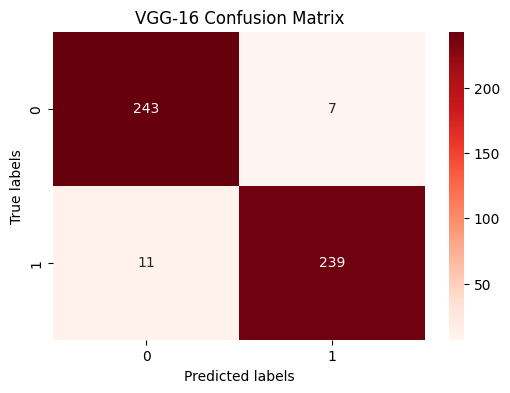

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred_vgg are already defined
# y_pred_vgg = vgg_16_model.predict(test_generator)
# y_pred_vgg = np.round(y_pred_vgg)
cm = confusion_matrix(y_true, y_pred_vgg)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('VGG-16 Confusion Matrix')
plt.show()


# Classification report of VGG-16 model

In [ ]:
cr = classification_report(y_true, y_pred_vgg, target_names=test_generator.class_indices.keys())

In [ ]:
# Classification report of VGG-16 model

cr = classification_report(y_true, y_pred_vgg, target_names=test_generator.class_indices.keys())

print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96       250
    positive       0.97      0.96      0.96       250

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



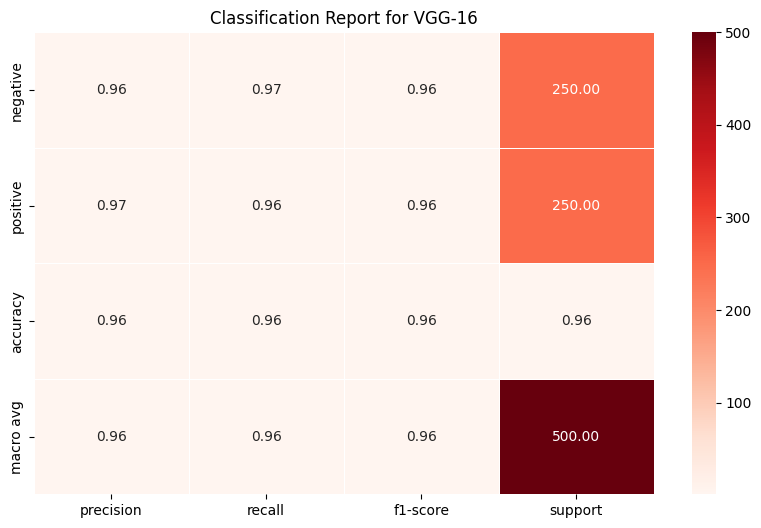

In [ ]:
# Assuming y_true and y_pred_vgg are already defined
# Generate the classification report
cr = classification_report(y_true, y_pred_vgg, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert classification report to a DataFrame
cr_df = pd.DataFrame(cr).T

# Plot the DataFrame using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cr_df.iloc[:-1, :].astype(float), annot=True, fmt=".2f", cmap="Reds", linewidths=.5)
plt.title('Classification Report for VGG-16')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_true and y_pred_vgg are already defined
# Generate the classification report
cr = classification_report(y_true, y_pred_vgg, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert classification report to a DataFrame
cr_df = pd.DataFrame(cr).T

# Display the DataFrame as a table
print("Classification Report for VGG-16:")
display(cr_df)  # Using display() for nicer output in Jupyter Notebooks or similar environments


Classification Report for VGG-16:


,precision,recall,f1-score,support
negative,0.956693,0.972,0.964286,250.000
positive,0.971545,0.956,0.963710,250.000
accuracy,0.964000,0.964,0.964000,0.964
macro avg,0.964119,0.964,0.963998,500.000
weighted avg,0.964119,0.964,0.963998,500.000


from matplotlib import pyplot as plt
cr_df['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cr_df['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cr_df['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cr_df['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cr_df.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cr_df.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cr_df.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cr_df['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cr_df['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cr_df['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cr_df['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

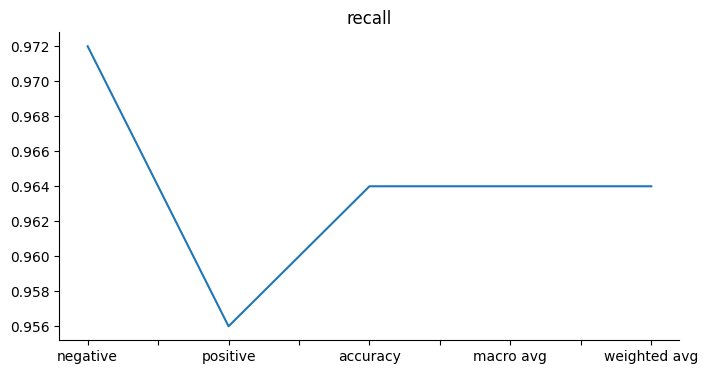

In [ ]:
from matplotlib import pyplot as plt
cr_df['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

#  ROC and AUC score of VGG-16 model

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_pred_vgg)

In [ ]:
roc_auc = auc(fpr, tpr)

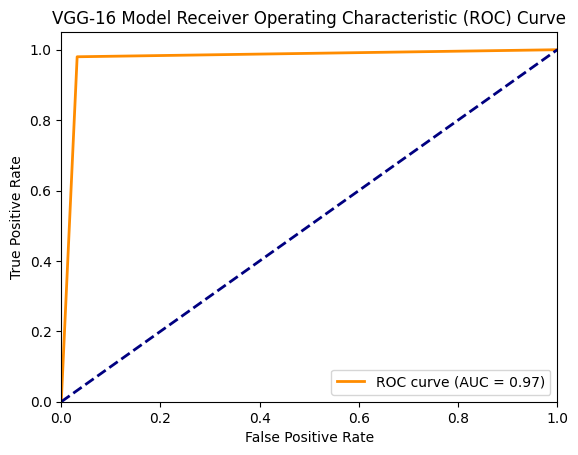

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG-16 Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_generator = data_generator.flow_from_directory(
  '/content/concrete_data_week4/test',
  target_size=(image_resize, image_resize),
  shuffle=False,
  class_mode='binary')

Found 500 images belonging to 2 classes.


In [ ]:
filenames=test_generator.filenames

In [ ]:
pred_resnet_50=resnet_50_model.predict_generator(test_generator, steps=len(test_generator), verbose=1).round(3)


<ipython-input-71-5272da7e7570>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_resnet_50=resnet_50_model.predict_generator(test_generator, steps=len(test_generator), verbose=1).round(3)


16/16 [==============================] - 2s 117ms/step


In [ ]:
test_generator.class_indices

{'negative': 0, 'positive': 1}

# VGG-19

In [ ]:
from keras.applications import VGG19

In [ ]:
vgg_19_model = Sequential()

vgg_19_model.add(VGG19(
  include_top=False,
  pooling='avg',
  weights='imagenet',
))

vgg_19_model.add(Dense(num_classes, activation='sigmoid'))
vgg_19_model.layers

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg_19_model.layers[0].layers

In [ ]:
vgg_19_model.layers[0].trainable = False

In [ ]:
vgg_19_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 20024897 (76.39 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


# Compile the model VGG19

In [ ]:
vgg_19_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=LR), loss='binary_crossentropy', metrics=['accuracy',
                                                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                                                tf.keras.metrics.FalsePositives(),
                                                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                                                tf.keras.metrics.TruePositives(),
                                                                                                                tf.keras.metrics.Precision(),
                                                                                                                tf.keras.metrics.Recall()])

# Train the model VGG19

In [ ]:
fit_history = vgg_19_model.fit_generator(
  train_generator,
  steps_per_epoch=steps_per_epoch_training,
  epochs=num_epochs,
  validation_data=validation_generator,
  validation_steps=steps_per_epoch_validation,
  callbacks=[callbacks_list],
  verbose=1,
)

<ipython-input-80-b85e6fd21842>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = vgg_19_model.fit_generator(


Epoch 1/2
235/235 [==============================] - 263s 1s/step - loss: 0.3994 - accuracy: 0.9252 - false_negatives_2: 934.0000 - false_positives_2: 1311.0000 - true_negatives_2: 13690.0000 - true_positives_2: 14066.0000 - precision_2: 0.9147 - recall_2: 0.9377 - val_loss: 0.2308 - val_accuracy: 0.9554 - val_false_negatives_2: 168.0000 - val_false_positives_2: 256.0000 - val_true_negatives_2: 4495.0000 - val_true_positives_2: 4582.0000 - val_precision_2: 0.9471 - val_recall_2: 0.9646
Epoch 2/2
235/235 [==============================] - 228s 970ms/step - loss: 0.1778 - accuracy: 0.9629 - false_negatives_2: 580.0000 - false_positives_2: 532.0000 - true_negatives_2: 14469.0000 - true_positives_2: 14420.0000 - precision_2: 0.9644 - recall_2: 0.9613 - val_loss: 0.1216 - val_accuracy: 0.9754 - val_false_negatives_2: 154.0000 - val_false_positives_2: 80.0000 - val_true_negatives_2: 4671.0000 - val_true_positives_2: 4596.0000 - val_precision_2: 0.9829 - val_recall_2: 0.9676


In [ ]:
loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall = vgg_19_model.evaluate(validation_generator, batch_size=batch_size_validation)
print(f"loss: {loss}\n accuracy: {accuracy}\n false_negatives: {false_negatives}\n false_positives: {false_positives}\n true_negatives: {true_negatives}\n true_positives: {true_positives}\n precision: {precision}\n recall: {recall}")

149/149 [==============================] - 51s 341ms/step - loss: 0.1333 - accuracy: 0.9792 - false_negatives_1: 108.0000 - false_positives_1: 90.0000 - true_negatives_1: 4661.0000 - true_positives_1: 4642.0000 - precision_1: 0.9810 - recall_1: 0.9773
loss: 0.1333008110523224
 accuracy: 0.9791600704193115
 false_negatives: 108.0
 false_positives: 90.0
 true_negatives: 4661.0
 true_positives: 4642.0
 precision: 0.9809805750846863
 recall: 0.9772631525993347


In [ ]:
import pandas as pd

# Assuming you already have the result from the model evaluation stored in variables
loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall = vgg_19_model.evaluate(validation_generator, batch_size=batch_size_validation)

# Create a dictionary with the metric names and their values
metrics = {
    "Metric": ["Loss", "Accuracy", "False Negatives", "False Positives", "True Negatives", "True Positives", "Precision", "Recall"],
    "Value": [loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
display(metrics_df)


149/149 [==============================] - 43s 288ms/step - loss: 0.1333 - accuracy: 0.9792 - false_negatives_1: 108.0000 - false_positives_1: 90.0000 - true_negatives_1: 4661.0000 - true_positives_1: 4642.0000 - precision_1: 0.9810 - recall_1: 0.9773


,Metric,Value
0,Loss,0.133301
1,Accuracy,0.979160
2,False Negatives,108.000000
3,False Positives,90.000000
4,True Negatives,4661.000000
5,True Positives,4642.000000
6,Precision,0.980981
7,Recall,0.977263


from matplotlib import pyplot as plt
metrics_df['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics_df.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
vgg_19_model.save('classifier_vgg_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate and Compare Models VGG19

In [ ]:
test_generator = data_generator.flow_from_directory(
  '/content/concrete_data_week4/test',
  target_size=(image_resize, image_resize),
  shuffle=False,
  class_mode='binary')

Found 500 images belonging to 2 classes.


# Predict test and make dataframe VGG19

In [ ]:
filenames=test_generator.filenames

In [ ]:
test_generator.class_indices

{'negative': 0, 'positive': 1}

# Confusion matrix of VGG-19 model

In [ ]:
y_pred_vgg19 = vgg_19_model.predict(test_generator)

16/16 [==============================] - 2s 141ms/step


In [ ]:
y_pred_vgg19 = np.round(y_pred_vgg19)

In [ ]:
cm = confusion_matrix(y_true, y_pred_vgg19)

In [ ]:
print("VGG-19 Confusion Matrix:")
print(cm)

VGG-19 Confusion Matrix:
[[243   7]
 [ 11 239]]


16/16 [==============================] - 2s 144ms/step


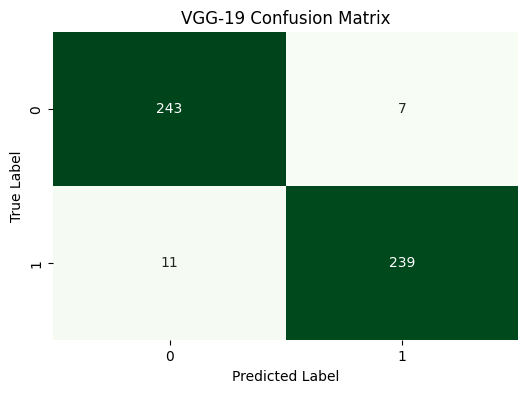

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true is already defined and you have y_pred_vgg19 from your model predictions
y_pred_vgg19 = vgg_19_model.predict(test_generator)
y_pred_vgg19 = np.round(y_pred_vgg19)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_vgg19)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('VGG-19 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Classification report of VGG-19 model

In [ ]:
cr = classification_report(y_true, y_pred_vgg19, target_names=test_generator.class_indices.keys())

In [ ]:
  print("Classification Report:")
  print(cr)

Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96       250
    positive       0.97      0.96      0.96       250

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [ ]:
# Assuming you have y_true, y_pred_vgg19, and test_generator defined
# Generate classification report
cr = classification_report(y_true, y_pred_vgg19, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert classification report to a DataFrame
cr_df = pd.DataFrame(cr).T

# Print the DataFrame as a table
print("Classification Report for VGG-19:")
display(cr_df)

Classification Report for VGG-19:


,precision,recall,f1-score,support
negative,0.956693,0.972,0.964286,250.000
positive,0.971545,0.956,0.963710,250.000
accuracy,0.964000,0.964,0.964000,0.964
macro avg,0.964119,0.964,0.963998,500.000
weighted avg,0.964119,0.964,0.963998,500.000


# ROC and AUC score of VGG-19 model

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_pred_vgg19)

In [ ]:
roc_auc = auc(fpr, tpr)

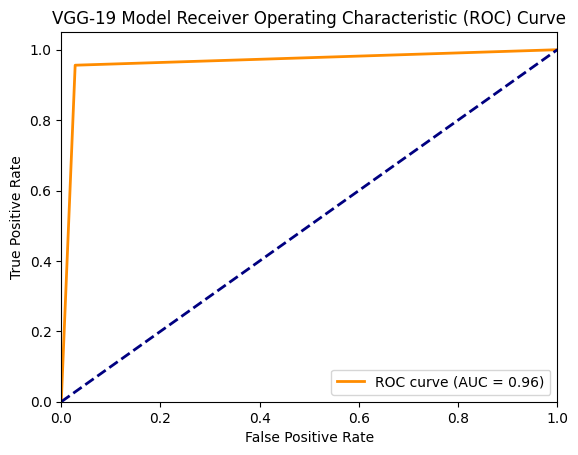

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG-19 Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Xception

In [ ]:
from keras.applications import Xception


In [ ]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense

xception_model = Sequential()

xception_model.add(Xception(
  include_top=False,
  pooling='avg',
  weights='imagenet',
))

xception_model.add(Dense(num_classes, activation='sigmoid'))
xception_model.layers


83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
xception_model.layers[0].layers

In [ ]:
xception_model.layers[0].trainable = False

In [ ]:
xception_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20863529 (79.59 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


# Compile the model Xception

In [ ]:
xception_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=LR), loss='binary_crossentropy', metrics=['accuracy',
                                                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                                                tf.keras.metrics.FalsePositives(),
                                                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                                                tf.keras.metrics.TruePositives(),
                                                                                                                tf.keras.metrics.Precision(),
                                                                                                                tf.keras.metrics.Recall()])

# Train the model  Xception

In [ ]:
fit_history =xception_model.fit_generator(
  train_generator,
  steps_per_epoch=steps_per_epoch_training,
  epochs=num_epochs,
  validation_data=validation_generator,
  validation_steps=steps_per_epoch_validation,
  callbacks=[callbacks_list],
  verbose=1,
)

<ipython-input-106-5a40bd993d1c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history =xception_model.fit_generator(


Epoch 1/2
235/235 [==============================] - 231s 906ms/step - loss: 0.1270 - accuracy: 0.9795 - false_negatives_3: 223.0000 - false_positives_3: 393.0000 - true_negatives_3: 14608.0000 - true_positives_3: 14777.0000 - precision_3: 0.9741 - recall_3: 0.9851 - val_loss: 0.0400 - val_accuracy: 0.9905 - val_false_negatives_3: 54.0000 - val_false_positives_3: 36.0000 - val_true_negatives_3: 4715.0000 - val_true_positives_3: 4696.0000 - val_precision_3: 0.9924 - val_recall_3: 0.9886
Epoch 2/2
235/235 [==============================] - 268s 1s/step - loss: 0.0251 - accuracy: 0.9941 - false_negatives_3: 113.0000 - false_positives_3: 65.0000 - true_negatives_3: 14936.0000 - true_positives_3: 14887.0000 - precision_3: 0.9957 - recall_3: 0.9925 - val_loss: 0.0260 - val_accuracy: 0.9920 - val_false_negatives_3: 43.0000 - val_false_positives_3: 33.0000 - val_true_negatives_3: 4718.0000 - val_true_positives_3: 4707.0000 - val_precision_3: 0.9930 - val_recall_3: 0.9909


In [ ]:
# Assuming you already have the result from the model evaluation stored in variables
loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall = xception_model.evaluate(validation_generator, batch_size=batch_size_validation)

# Create a dictionary with the metric names and their values
metrics = {
    "Metric": ["Loss", "Accuracy", "False Negatives", "False Positives", "True Negatives", "True Positives", "Precision", "Recall"],
    "Value": [loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
display(metrics_df)

149/149 [==============================] - 39s 260ms/step - loss: 0.0260 - accuracy: 0.9920 - false_negatives_3: 43.0000 - false_positives_3: 33.0000 - true_negatives_3: 4718.0000 - true_positives_3: 4707.0000 - precision_3: 0.9930 - recall_3: 0.9909


,Metric,Value
0,Loss,0.026043
1,Accuracy,0.992001
2,False Negatives,43.000000
3,False Positives,33.000000
4,True Negatives,4718.000000
5,True Positives,4707.000000
6,Precision,0.993038
7,Recall,0.990947


# Evaluate and Compare Models Xception

In [ ]:
test_generator = data_generator.flow_from_directory(
  '/content/concrete_data_week4/test',
  target_size=(image_resize, image_resize),
  shuffle=False,
  class_mode='binary')

Found 500 images belonging to 2 classes.


# Predict test and make dataframe Xception

In [ ]:
filenames=test_generator.filenames

In [ ]:
test_generator.class_indices

{'negative': 0, 'positive': 1}

# Confusion matrix of Xception model

In [ ]:
y_pred_xception = xception_model.predict(test_generator)

16/16 [==============================] - 8s 266ms/step


In [ ]:
y_pred_xception = np.round(y_pred_xception)

In [ ]:
cm = confusion_matrix(y_true, y_pred_xception)

In [ ]:
print("Xception Confusion Matrix:")
print(cm)

Xception Confusion Matrix:
[[248   2]
 [  0 250]]


16/16 [==============================] - 3s 175ms/step


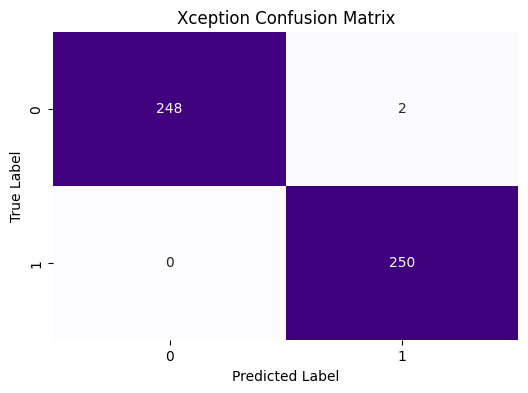

In [ ]:
# Assuming y_true is already defined and you have y_pred_xception from your model predictions
y_pred_xception = xception_model.predict(test_generator)
y_pred_xception = np.round(y_pred_xception)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_xception)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title('Xception Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report of Xception model

In [ ]:
cr = classification_report(y_true, y_pred_xception, target_names=test_generator.class_indices.keys())

In [ ]:
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.99      1.00       250
    positive       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
# Assuming you have y_true, y_pred_xception, and test_generator defined
# Generate classification report
cr = classification_report(y_true, y_pred_xception, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert classification report to a DataFrame
cr_df = pd.DataFrame(cr).T

# Print the DataFrame as a table
print("Classification Report for Xception:")
display(cr_df)

Classification Report for Xception:


,precision,recall,f1-score,support
negative,1.000000,0.992,0.995984,250.000
positive,0.992063,1.000,0.996016,250.000
accuracy,0.996000,0.996,0.996000,0.996
macro avg,0.996032,0.996,0.996000,500.000
weighted avg,0.996032,0.996,0.996000,500.000


# ROC and AUC score of Xception model

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_pred_xception)

In [ ]:
roc_auc = auc(fpr, tpr)

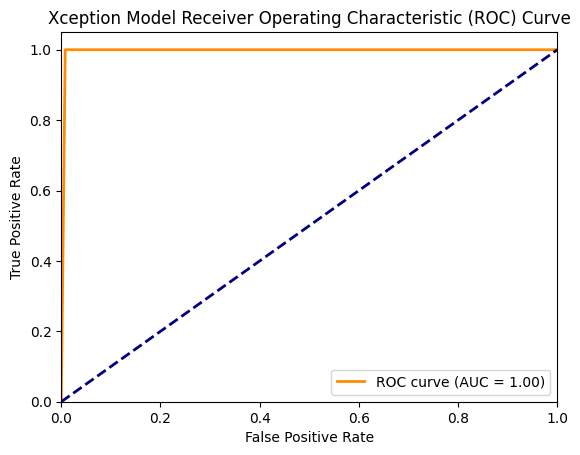

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xception Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

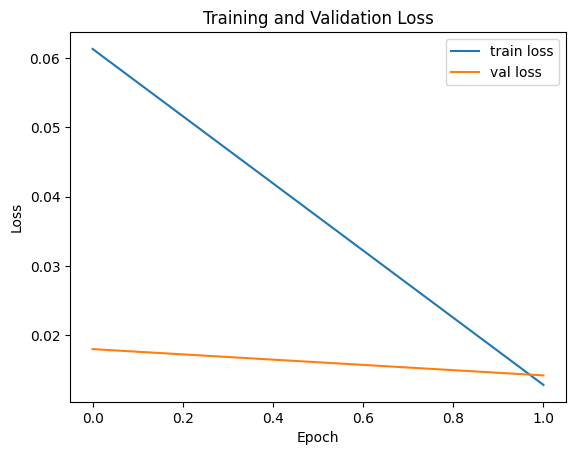

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting Loss
plt.plot(fit_history.history['loss'], label='train loss')
plt.plot(fit_history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('LossVal_loss.png')  # Save the figure as LossVal_loss.png

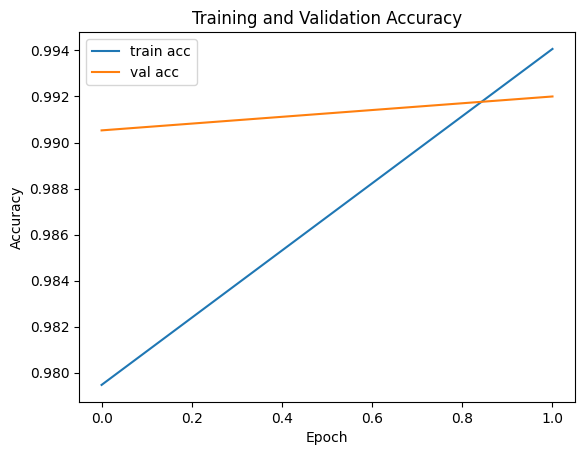

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting Accuracy
plt.plot(fit_history.history['accuracy'], label='train acc')
plt.plot(fit_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()
plt.savefig('AccVal_acc.png')  # Save the figure as AccVal_acc.png

# INCEPTION V3

In [ ]:
from keras.applications import InceptionV3


In [ ]:
from keras.applications import InceptionV3  # Import InceptionV3 instead of Xception

# Instantiate a Sequential model
inception_model = Sequential()

# Add InceptionV3 base pre-trained on ImageNet
inception_model.add(InceptionV3(
  include_top=False,
  pooling='avg',
  weights='imagenet',
))

# Add a Dense layer for classification
inception_model.add(Dense(num_classes, activation='sigmoid'))

# Print the layers in the model
inception_model.layers


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
inception_model.layers[0].layers

In [ ]:
inception_model.layers[0].trainable = False

In [ ]:
inception_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 21804833 (83.18 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


# Compile the model INception

In [ ]:
inception_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=LR), loss='binary_crossentropy', metrics=['accuracy',
                                                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                                                tf.keras.metrics.FalsePositives(),
                                                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                                                tf.keras.metrics.TruePositives(),
                                                                                                                tf.keras.metrics.Precision(),
                                                                                                                tf.keras.metrics.Recall()])

# Train the model inception

In [ ]:
fit_history =inception_model.fit_generator(
  train_generator,
  steps_per_epoch=steps_per_epoch_training,
  epochs=num_epochs,
  validation_data=validation_generator,
  validation_steps=steps_per_epoch_validation,
  callbacks=[callbacks_list],
  verbose=1,
)

<ipython-input-130-3fe693b266f7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history =inception_model.fit_generator(


Epoch 1/2
235/235 [==============================] - 231s 883ms/step - loss: 0.0613 - accuracy: 0.9867 - false_negatives_4: 183.0000 - false_positives_4: 216.0000 - true_negatives_4: 14785.0000 - true_positives_4: 14817.0000 - precision_4: 0.9856 - recall_4: 0.9878 - val_loss: 0.0180 - val_accuracy: 0.9958 - val_false_negatives_4: 23.0000 - val_false_positives_4: 17.0000 - val_true_negatives_4: 4734.0000 - val_true_positives_4: 4727.0000 - val_precision_4: 0.9964 - val_recall_4: 0.9952
Epoch 2/2
235/235 [==============================] - 134s 572ms/step - loss: 0.0128 - accuracy: 0.9963 - false_negatives_4: 66.0000 - false_positives_4: 45.0000 - true_negatives_4: 14956.0000 - true_positives_4: 14934.0000 - precision_4: 0.9970 - recall_4: 0.9956 - val_loss: 0.0142 - val_accuracy: 0.9960 - val_false_negatives_4: 23.0000 - val_false_positives_4: 15.0000 - val_true_negatives_4: 4736.0000 - val_true_positives_4: 4727.0000 - val_precision_4: 0.9968 - val_recall_4: 0.9952


In [ ]:
# Assuming you already have the result from the model evaluation stored in variables
loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall = inception_model.evaluate(validation_generator, batch_size=batch_size_validation)

# Create a dictionary with the metric names and their values
metrics = {
    "Metric": ["Loss", "Accuracy", "False Negatives", "False Positives", "True Negatives", "True Positives", "Precision", "Recall"],
    "Value": [loss, accuracy, false_negatives, false_positives, true_negatives, true_positives, precision, recall]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
display(metrics_df)

149/149 [==============================] - 30s 201ms/step - loss: 0.0142 - accuracy: 0.9960 - false_negatives_4: 23.0000 - false_positives_4: 15.0000 - true_negatives_4: 4736.0000 - true_positives_4: 4727.0000 - precision_4: 0.9968 - recall_4: 0.9952


,Metric,Value
0,Loss,0.014194
1,Accuracy,0.996000
2,False Negatives,23.000000
3,False Positives,15.000000
4,True Negatives,4736.000000
5,True Positives,4727.000000
6,Precision,0.996837
7,Recall,0.995158


# Evaluate and Compare Models Inception

In [ ]:
test_generator = data_generator.flow_from_directory(
  '/content/concrete_data_week4/test',
  target_size=(image_resize, image_resize),
  shuffle=False,
  class_mode='binary')

Found 500 images belonging to 2 classes.


# Predict test and make dataframe Xception

In [ ]:
filenames=test_generator.filenames

In [ ]:
test_generator.class_indices

{'negative': 0, 'positive': 1}

# Confusion matrix of Inception model

In [ ]:
y_pred_inception = inception_model.predict(test_generator)

16/16 [==============================] - 7s 221ms/step


In [ ]:
y_pred_inception = np.round(y_pred_inception)

In [ ]:
cm = confusion_matrix(y_true, y_pred_inception)

In [ ]:
print("inception Confusion Matrix:")
print(cm)

inception Confusion Matrix:
[[250   0]
 [  1 249]]


16/16 [==============================] - 2s 129ms/step


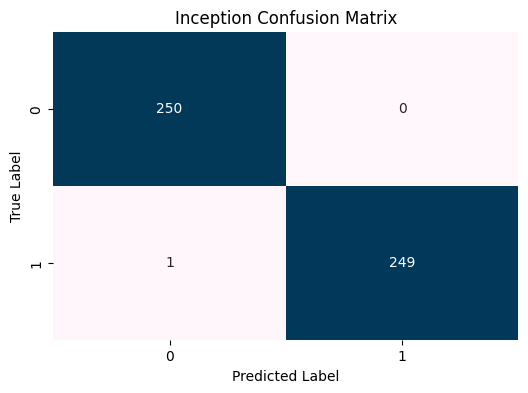

In [ ]:
# Assuming y_true is already defined and you have y_pred_inception from your model predictions
y_pred_inception = inception_model.predict(test_generator)
y_pred_inception = np.round(y_pred_inception)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_inception)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", cbar=False)
plt.title('Inception Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report of Inception model

In [ ]:
cr = classification_report(y_true, y_pred_inception, target_names=test_generator.class_indices.keys())

In [ ]:
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       250
    positive       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
# Assuming you have y_true, y_pred_inception, and test_generator defined
# Generate classification report
cr = classification_report(y_true, y_pred_inception, target_names=test_generator.class_indices.keys(), output_dict=True)

# Convert classification report to a DataFrame
cr_df = pd.DataFrame(cr).T

# Print the DataFrame as a table
print("Classification Report for Inception:")
display(cr_df)

Classification Report for Inception:


,precision,recall,f1-score,support
negative,0.996016,1.000,0.998004,250.000
positive,1.000000,0.996,0.997996,250.000
accuracy,0.998000,0.998,0.998000,0.998
macro avg,0.998008,0.998,0.998000,500.000
weighted avg,0.998008,0.998,0.998000,500.000


# ROC and AUC score of inception model

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_pred_inception)

In [ ]:
roc_auc = auc(fpr, tpr)

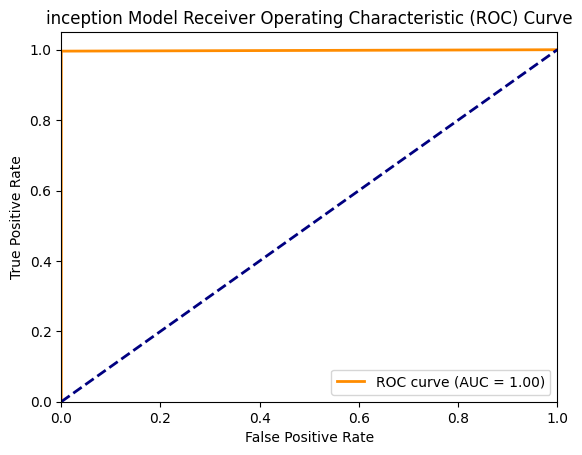

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('inception Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Accuracy Graph Inception

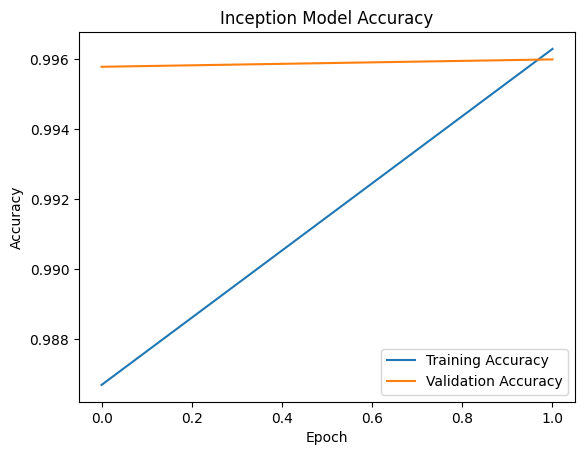

In [ ]:
# Plotting the training and validation accuracy
plt.plot(fit_history.history['accuracy'], label='Training Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Inception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

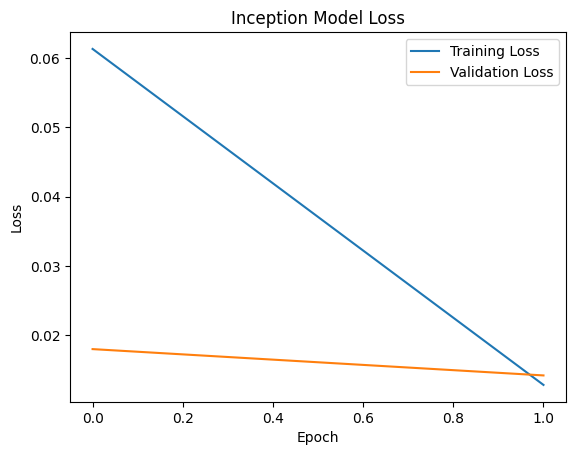

In [ ]:
# Plotting the training and validation loss
plt.plot(fit_history.history['loss'], label='Training Loss')
plt.plot(fit_history.history['val_loss'], label='Validation Loss')
plt.title('Inception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()